In [5]:
cd mmdetection

D:\plantdetection\mmdetection


In [7]:
import pickle

# 저장된 pkl 파일 불러오기
pkl_path = "evaluation_results/results.pkl"


with open(pkl_path, "rb") as f:
    results = pickle.load(f)

# 첫 번째 이미지의 예측 결과 확인
print(results[0])


{'img_shape': (1067, 800), 'img_id': 1, 'scale_factor': (0.26455026455026454, 0.2646329365079365), 'ori_shape': (4032, 3024), 'batch_input_shape': (1088, 800), 'pad_shape': (1088, 800), 'img_path': 'data\\onion_test\\20200521_094513.jpg', 'pred_instances': {'labels': tensor([0, 0, 0, 2, 1, 0, 0, 1]), 'bboxes': tensor([[ 821.4473,  594.6888, 1676.1376, 3075.4094],
        [ 565.4731, 1626.1154, 1641.1290, 3169.1003],
        [1703.9275, 2196.5784, 2583.2288, 3401.1926],
        [1576.2639, 3527.5884, 1806.6259, 3693.5271],
        [1604.5060, 3034.2405, 1804.2111, 3622.2056],
        [1730.7812, 1948.5330, 2185.8154, 3189.6716],
        [ 372.9804, 2699.7332, 1650.1719, 3294.8252],
        [2631.9395, 2332.9146, 2755.0464, 2825.9998]]), 'scores': tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]), 'masks': [{'size': [4032, 3024], 'counts': b'f^i\\33hm3:G8H8H7J7I5L5J6K4L4L4L4M20O1M4L4L4L5K4K6J6J6J7I7G9HPSn3IVmQL:G8H8H8I6J6J6K5J5L4L4L4M3L3M4OO2N1N3N2N2M4L3M4L4L5J5J7H

In [3]:
import pickle
from mmdet.evaluation.metrics import CocoMetric

# 🔹 저장된 pkl 파일 경로
pkl_path = "inference_result/result/results.pkl"

# 🔹 테스트 데이터셋의 GT 파일 (json) 경로
ann_file = "data/melon_test/dataset.json"

# 🔹 pkl 파일 불러오기
with open(pkl_path, "rb") as f:
    results = pickle.load(f)

# 🔹 COCO 평가 메트릭 객체 생성
coco_metric = CocoMetric(
    ann_file=ann_file,
    metric=['bbox', 'segm'],  # bbox (박스) & segm (마스크) 평가
    classwise=False  # 클래스별 AP도 보고 싶다면 True
)

# 🔹 평가 실행
coco_metric.dataset_meta = dict(classes = ["fruit", "cap", "petiole", "stem", "midrib", "leaf", "flower"] )  # 클래스 이름 설정
coco_metric.process({}, results)
map_results = coco_metric.evaluate(size=len(results))

# 🔹 결과 출력
for key, value in map_results.items():
    print(f"{key}: {value:.4f}")


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
02/28 17:54:03 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.324
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.402
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.388
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.235
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.342
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.347
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.347
 Avera

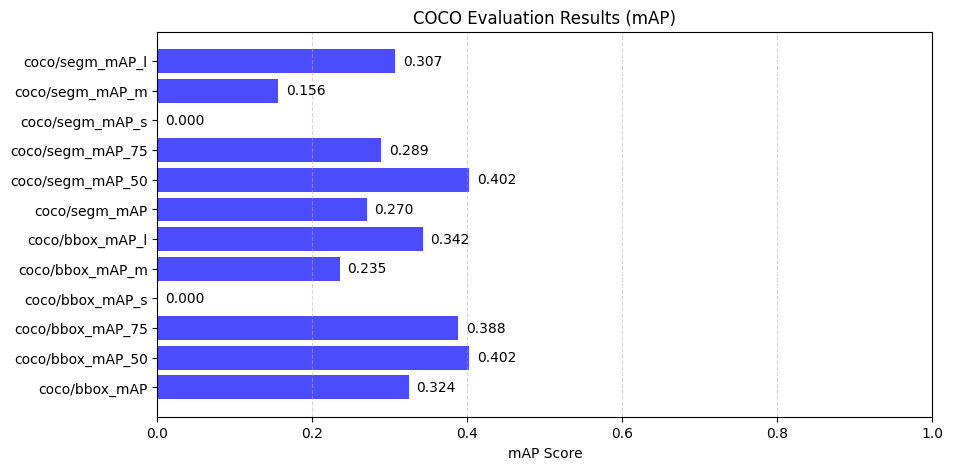

In [15]:
import matplotlib.pyplot as plt

# mAP 결과 데이터
map_results = {
    "coco/bbox_mAP": 0.324,
    "coco/bbox_mAP_50": 0.402,
    "coco/bbox_mAP_75": 0.388,
    "coco/bbox_mAP_s": 0.000,
    "coco/bbox_mAP_m": 0.235,
    "coco/bbox_mAP_l": 0.342,
    "coco/segm_mAP": 0.270,
    "coco/segm_mAP_50": 0.402,
    "coco/segm_mAP_75": 0.289,
    "coco/segm_mAP_s": 0.000,
    "coco/segm_mAP_m": 0.156,
    "coco/segm_mAP_l": 0.307
}

# 데이터 분리
metrics = list(map_results.keys())
values = list(map_results.values())

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.barh(metrics, values, color='blue', alpha=0.7)
plt.xlabel("mAP Score")
plt.title("COCO Evaluation Results (mAP)")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# 값 표시
for i, v in enumerate(values):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center', fontsize=10)

# 출력
plt.show()


In [21]:
import pandas as pd

# mAP 결과를 DataFrame으로 변환
df_results = pd.DataFrame(list(map_results.items()), columns=['Metric', 'Value'])

df_results

,Metric,Value
0,coco/bbox_mAP,0.324
1,coco/bbox_mAP_50,0.402
2,coco/bbox_mAP_75,0.388
3,coco/bbox_mAP_s,0.000
4,coco/bbox_mAP_m,0.235
5,coco/bbox_mAP_l,0.342
6,coco/segm_mAP,0.270
7,coco/segm_mAP_50,0.402
8,coco/segm_mAP_75,0.289
9,coco/segm_mAP_s,0.000


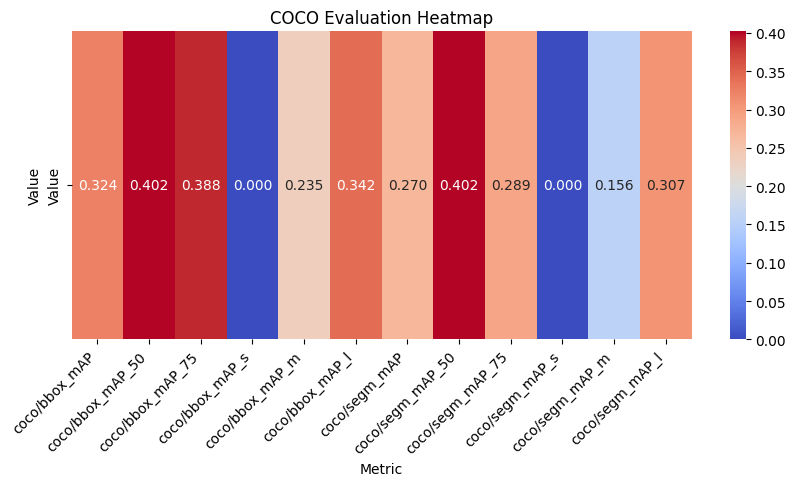

In [26]:
# 라이브러리 다시 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 준비
map_results = {
    "coco/bbox_mAP": 0.324,
    "coco/bbox_mAP_50": 0.402,
    "coco/bbox_mAP_75": 0.388,
    "coco/bbox_mAP_s": 0.000,
    "coco/bbox_mAP_m": 0.235,
    "coco/bbox_mAP_l": 0.342,
    "coco/segm_mAP": 0.270,
    "coco/segm_mAP_50": 0.402,
    "coco/segm_mAP_75": 0.289,
    "coco/segm_mAP_s": 0.000,
    "coco/segm_mAP_m": 0.156,
    "coco/segm_mAP_l": 0.307
}

df_results = pd.DataFrame(map_results.items(), columns=['Metric', 'Value'])

# 히트맵 그리기 (글씨가 안 겹치도록 회전)
plt.figure(figsize=(10, 4))
ax = sns.heatmap(df_results.set_index('Metric').T, annot=True, cmap="coolwarm", cbar=True, fmt=".3f")

# x축 글씨 회전 조정
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.title("COCO Evaluation Heatmap")
plt.xlabel("Metric")
plt.ylabel("Value")
plt.show()


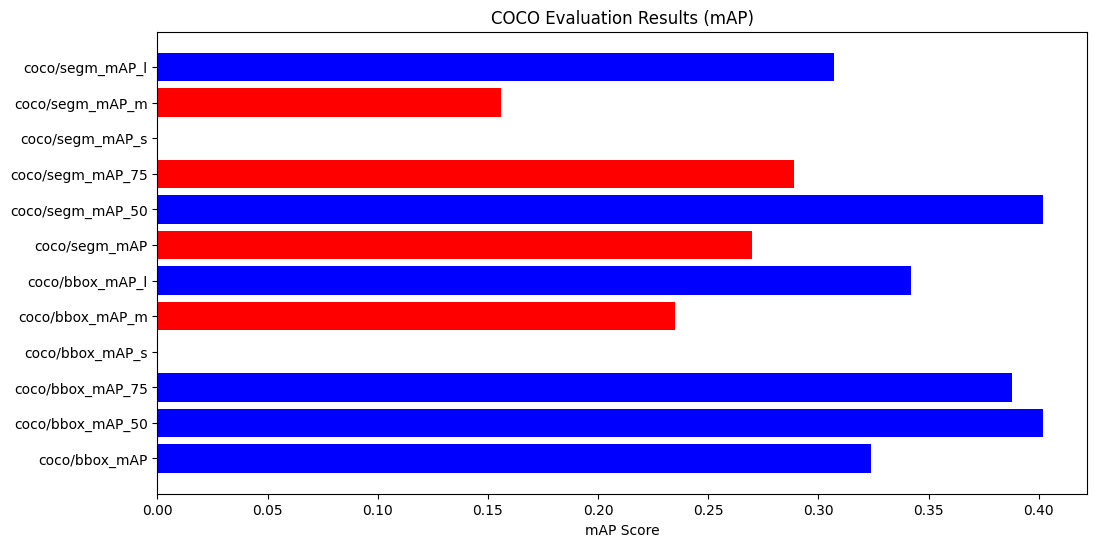

In [24]:
plt.figure(figsize=(12, 6))
plt.barh(df_results["Metric"], df_results["Value"], color=['red' if v < 0.3 else 'blue' for v in df_results["Value"]])
plt.xlabel("mAP Score")
plt.title("COCO Evaluation Results (mAP)")
plt.show()


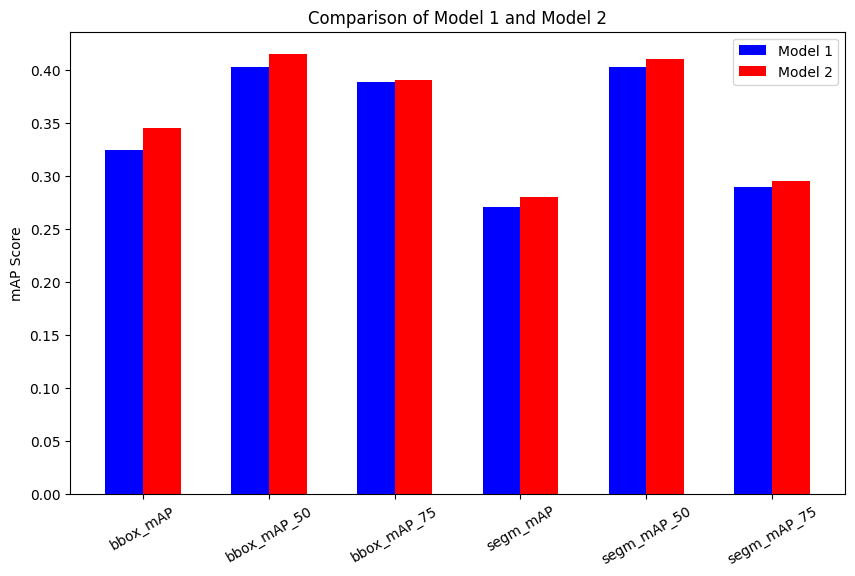

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 모델 결과 데이터 (예시)
metrics = ["bbox_mAP", "bbox_mAP_50", "bbox_mAP_75", "segm_mAP", "segm_mAP_50", "segm_mAP_75"]
model1_scores = [0.324, 0.402, 0.388, 0.270, 0.402, 0.289]  # 첫 번째 모델 성능
model2_scores = [0.345, 0.415, 0.390, 0.280, 0.410, 0.295]  # 두 번째 모델 성능

x = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.15, model1_scores, width=0.3, label="Model 1", color='b')
plt.bar(x + 0.15, model2_scores, width=0.3, label="Model 2", color='r')

plt.xticks(x, metrics, rotation=30)
plt.ylabel("mAP Score")
plt.title("Comparison of Model 1 and Model 2")
plt.legend()
plt.show()


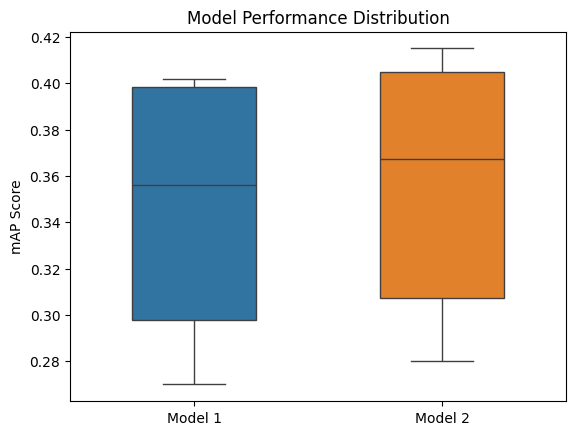

In [28]:
sns.boxplot(data=[model1_scores, model2_scores], width=0.5)
plt.xticks([0, 1], ["Model 1", "Model 2"])
plt.ylabel("mAP Score")
plt.title("Model Performance Distribution")
plt.show()
